In [163]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Building training and testing datasets from the cell_images folder

In [164]:
# Transforming the images to the fixed size = 128x128 (original image sizes vary!)
transform = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Resize((32,32))
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

# two classes to be detected
classes = ('parasitized','uninfected')
batch_size = 128

train_db = torchvision.datasets.ImageFolder(root='cell_images/train',transform=transform)
test_db = torchvision.datasets.ImageFolder(root='cell_images/test',transform=transform)
train_loader = DataLoader(train_db, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_db, batch_size=batch_size, shuffle=True)

print("training dataset size =",len(train_db))
print("testing dataset size =",len(test_db))

training dataset size = 24958
testing dataset size = 2600


## Displaying samples of images from the dataset and verifying dataset size

batch size =  128


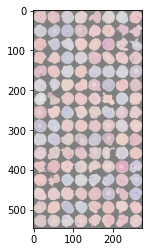

parasitized parasitized uninfected parasitized uninfected parasitized uninfected parasitized uninfected uninfected parasitized parasitized uninfected parasitized uninfected parasitized parasitized uninfected uninfected parasitized uninfected parasitized parasitized uninfected uninfected parasitized uninfected parasitized parasitized uninfected parasitized parasitized parasitized uninfected parasitized uninfected uninfected parasitized uninfected uninfected parasitized uninfected uninfected parasitized parasitized uninfected parasitized uninfected uninfected uninfected uninfected uninfected parasitized parasitized uninfected uninfected parasitized uninfected parasitized uninfected parasitized parasitized uninfected uninfected uninfected parasitized parasitized uninfected parasitized uninfected uninfected uninfected uninfected uninfected parasitized parasitized parasitized uninfected uninfected parasitized parasitized parasitized parasitized parasitized uninfected uninfected parasitized 

In [165]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
train_iter = iter(train_loader)
train_images, train_labels = next(train_iter)

print("batch size = ",len(train_images))

# # show images
imshow(torchvision.utils.make_grid(train_images))
# print labels
print(' '.join(f'{classes[train_labels[j]]:5s}' for j in range(batch_size)))


In [166]:
# One batch size
print("batch shape =",train_images.shape)
train_images_min,train_images_max = 1e9,-1e9
for batch_images, _ in test_loader:
        train_images_max = max(batch_images.view(-1).max(), train_images_max)
        train_images_min = min(batch_images.view(-1).min(), train_images_min)        
        
print("training images min =",train_images_min, " and max =",train_images_max)

batch shape = torch.Size([128, 3, 32, 32])
training images min = tensor(0.)  and max = tensor(1.)


## Creating a CNN model

In [175]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()      
        # 1 input image channel (grayscale), 10 output channels/feature maps
        # 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,3, padding=1)
        self.fc1 = nn.Linear(8*8*16,64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64,1)
        #self.fc3 = nn.Linear(128,64)
        #self.fc4 = nn.Linear(64,10)
        
        self.sigmoid = nn.Sigmoid()


    ## TODO: define the feedforward behavior
    def forward(self, x):
        # one activated conv layer
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        # x = self.dropout(x)
        x = self.fc2(x)
        #x = self.dropout(x)
        #x = F.relu(self.fc3(x))  
        #x = self.dropout(x)
        #x = F.relu(self.fc4(x))
        
        # final output
        return self.sigmoid(x.squeeze())

# instantiate and print your Net
net = CNN()
print(net)

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [176]:
print(net(train_images))

tensor([0.5245, 0.5240, 0.5257, 0.5239, 0.5256, 0.5256, 0.5236, 0.5260, 0.5250,
        0.5257, 0.5272, 0.5259, 0.5236, 0.5246, 0.5258, 0.5283, 0.5273, 0.5270,
        0.5266, 0.5268, 0.5269, 0.5268, 0.5259, 0.5238, 0.5245, 0.5250, 0.5250,
        0.5251, 0.5269, 0.5257, 0.5256, 0.5264, 0.5256, 0.5255, 0.5255, 0.5242,
        0.5245, 0.5263, 0.5244, 0.5259, 0.5244, 0.5255, 0.5268, 0.5256, 0.5223,
        0.5245, 0.5265, 0.5249, 0.5251, 0.5226, 0.5268, 0.5228, 0.5249, 0.5209,
        0.5252, 0.5252, 0.5265, 0.5279, 0.5238, 0.5262, 0.5253, 0.5249, 0.5257,
        0.5215, 0.5254, 0.5262, 0.5250, 0.5238, 0.5236, 0.5267, 0.5272, 0.5263,
        0.5248, 0.5264, 0.5261, 0.5273, 0.5259, 0.5282, 0.5265, 0.5223, 0.5260,
        0.5250, 0.5266, 0.5258, 0.5246, 0.5242, 0.5259, 0.5239, 0.5270, 0.5260,
        0.5255, 0.5251, 0.5266, 0.5264, 0.5256, 0.5259, 0.5260, 0.5253, 0.5234,
        0.5243, 0.5249, 0.5272, 0.5256, 0.5260, 0.5247, 0.5243, 0.5266, 0.5274,
        0.5262, 0.5266, 0.5224, 0.5249, 

In [180]:

## TODO: specify loss function (try categorical cross-entropy)
criterion = torch.nn.BCELoss()

## TODO: specify optimizer 
optimizer = optim.SGD(net.parameters(), lr=0.1)

n_epochs = 1

In [181]:
def train(n_epochs):
    training_loss=[]
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            inputs, labels = data

            # wrap them in a torch Variable
            #inputs, labels = Variable(inputs), Variable(labels)        

            # zero the parameter (weight) gradients
            optimizer.zero_grad()

            # forward pass to get outputs
            outputs = net(inputs)

            # calculate the loss
            loss = criterion(outputs, labels.float())

            # backward pass to calculate the parameter gradients
            loss.backward()

            # update the parameters
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()   #################################### changed loss.data[0] to loss.item()
            
            if batch_i % 1 == 0:    # print every 1000 mini-batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss))
                training_loss.append(running_loss/1000)  #################### recording average loss per batch
                running_loss = 0.0

    print('Finished Training')
    return training_loss

In [182]:
# define the number of epochs to train for
n_epochs = 1 # start small to see if your model works, initially

# call train
training_loss = train(n_epochs)

Epoch: 1, Batch: 1, Avg. Loss: 0.6872375011444092
Epoch: 1, Batch: 2, Avg. Loss: 0.6864879727363586
Epoch: 1, Batch: 3, Avg. Loss: 0.6899681091308594
Epoch: 1, Batch: 4, Avg. Loss: 0.6891360282897949
Epoch: 1, Batch: 5, Avg. Loss: 0.6842733025550842
Epoch: 1, Batch: 6, Avg. Loss: 0.6832374334335327
Epoch: 1, Batch: 7, Avg. Loss: 0.6851813793182373
Epoch: 1, Batch: 8, Avg. Loss: 0.6881322264671326
Epoch: 1, Batch: 9, Avg. Loss: 0.6828357577323914
Epoch: 1, Batch: 10, Avg. Loss: 0.686994731426239
Epoch: 1, Batch: 11, Avg. Loss: 0.68412184715271
Epoch: 1, Batch: 12, Avg. Loss: 0.6811110973358154
Epoch: 1, Batch: 13, Avg. Loss: 0.6832039952278137
Epoch: 1, Batch: 14, Avg. Loss: 0.6857391595840454
Epoch: 1, Batch: 15, Avg. Loss: 0.6829811930656433
Epoch: 1, Batch: 16, Avg. Loss: 0.6730798482894897
Epoch: 1, Batch: 17, Avg. Loss: 0.6787465214729309
Epoch: 1, Batch: 18, Avg. Loss: 0.6839950084686279
Epoch: 1, Batch: 19, Avg. Loss: 0.6784809231758118
Epoch: 1, Batch: 20, Avg. Loss: 0.682646572

Epoch: 1, Batch: 163, Avg. Loss: 0.6868555545806885
Epoch: 1, Batch: 164, Avg. Loss: 0.66991126537323
Epoch: 1, Batch: 165, Avg. Loss: 0.6468337774276733
Epoch: 1, Batch: 166, Avg. Loss: 0.6739095449447632
Epoch: 1, Batch: 167, Avg. Loss: 0.6430020928382874
Epoch: 1, Batch: 168, Avg. Loss: 0.6340725421905518
Epoch: 1, Batch: 169, Avg. Loss: 0.6618219614028931
Epoch: 1, Batch: 170, Avg. Loss: 0.6483150124549866
Epoch: 1, Batch: 171, Avg. Loss: 0.6788647770881653
Epoch: 1, Batch: 172, Avg. Loss: 0.64738929271698
Epoch: 1, Batch: 173, Avg. Loss: 0.6952674388885498
Epoch: 1, Batch: 174, Avg. Loss: 0.6733089089393616
Epoch: 1, Batch: 175, Avg. Loss: 0.6398719549179077
Epoch: 1, Batch: 176, Avg. Loss: 0.6493562459945679
Epoch: 1, Batch: 177, Avg. Loss: 0.6698740720748901
Epoch: 1, Batch: 178, Avg. Loss: 0.6602724194526672
Epoch: 1, Batch: 179, Avg. Loss: 0.677715539932251
Epoch: 1, Batch: 180, Avg. Loss: 0.6258231401443481
Epoch: 1, Batch: 181, Avg. Loss: 0.6845149397850037
Epoch: 1, Batch: 